In [4]:
# pip install ceml

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from ceml.sklearn import generate_counterfactual
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
import dice_ml

In [64]:
# df = pd.read_csv('data_cleaned.csv').drop(['Country', 'Timestamp'], axis=1)
# df.head()

In [135]:
df = pd.read_csv('data_cleaned.csv').drop(['Country', 'Timestamp', 'Mental_Health_History'], axis=1)
# df['Mental_Health_History'] = df['Mental_Health_History'].map({'Yes': True, 'No': False}) #remove maybe
# df['Mental_Health_History'] = df['Mental_Health_History'].astype(bool)
df.head()



,Female,self_employed,family_history,treatment,Coping_Struggles,Occupation_Business,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,...,Northern_America,Northern_Europe,South_America,Southeastern_Asia,Southern_Africa,Southern_Asia,Southern_Europe,Western_Africa,Western_Asia,Western_Europe
0,True,False,True,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,True,False,True,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,True,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [136]:
df = df.astype(float)
df.head()

,Female,self_employed,family_history,treatment,Coping_Struggles,Occupation_Business,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,...,Northern_America,Northern_Europe,South_America,Southeastern_Asia,Southern_Africa,Southern_Asia,Southern_Europe,Western_Africa,Western_Asia,Western_Europe
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
# df.columns

In [137]:
target = 'treatment'
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# df_train, df_test = train_test_split(df, test_size=0.2)
# X_train = df_train.drop(columns=['treatment']).to_numpy() #make variable
# y_train = df_train['treatment'].to_numpy() #make variable
# X_test = df_test.drop(columns=['treatment']).to_numpy() #make variable
# y_test = df_test['treatment'].to_numpy() #make variable


In [138]:
# %% Fit blackbox model
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")


F1 Score 0.7039757404586073
Accuracy 0.7039855135549249


# Feature importance

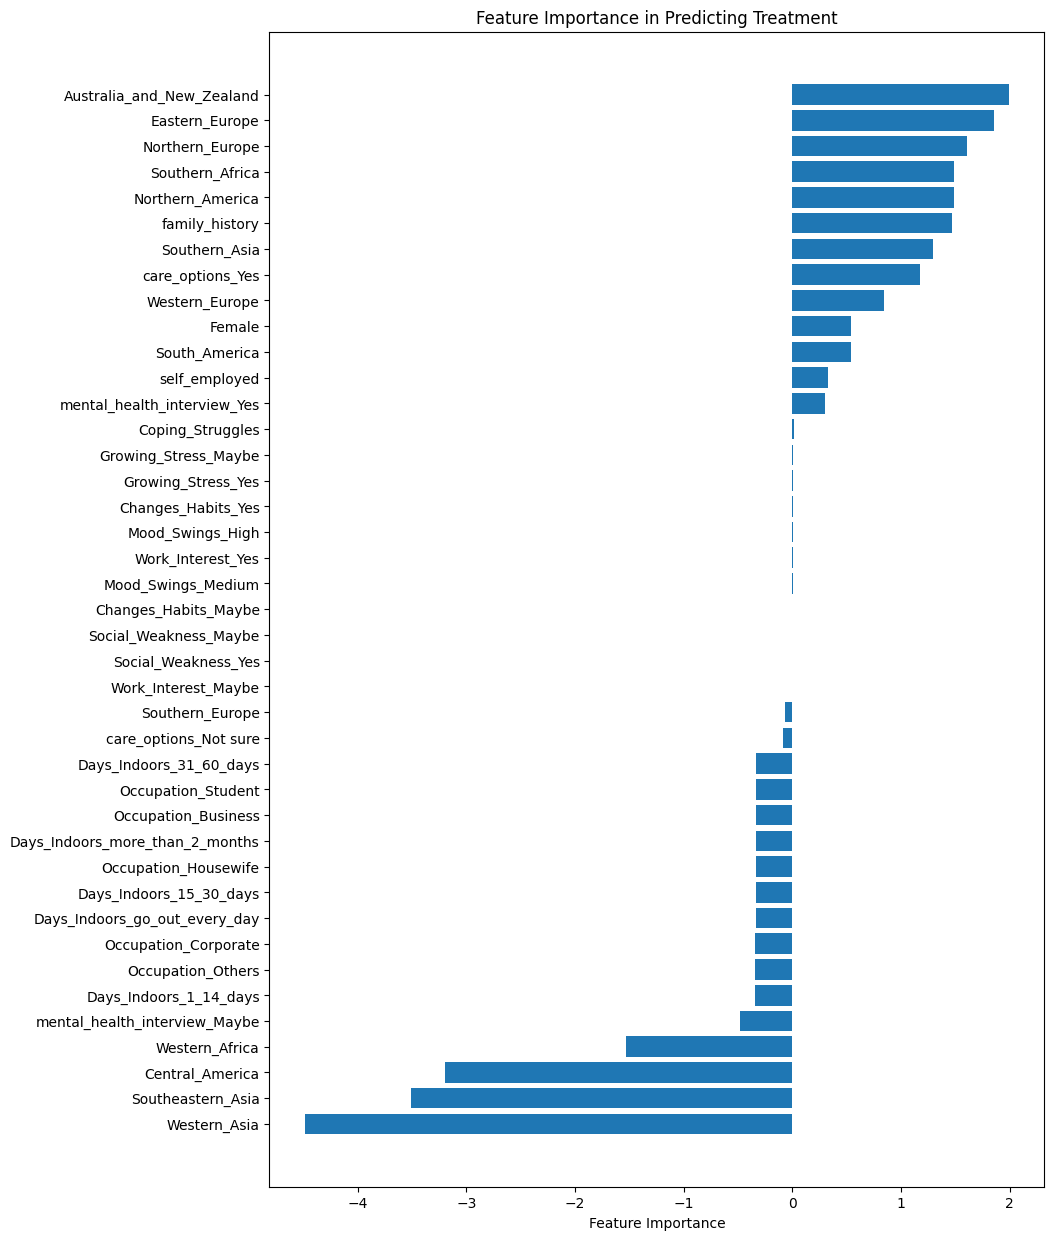

In [149]:
# importances = rf.feature_importances_
# feature_names = X.columns
# sorted_indices = importances.argsort()

# plt.figure(figsize=(10, 15))
# plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
# plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
# plt.xlabel('Feature Importance')
# plt.title('Feature Importance in Predicting Mental Health History')
# plt.show()
 


importances = clf.coef_[0]
feature_names = X.columns
sorted_indices = importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 15))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting Treatment')
plt.show()

# importances = clf.coef_[0]
# feature_names = X.columns
# sorted_indices = importances.argsort()

# # Plot feature importance
# plt.figure(figsize=(10, 15))
# plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
# plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
# plt.xlabel('Feature Importance')
# plt.title('Feature Importance in Predicting Treatment')
# plt.xlim(left=0)  # Set x-axis to start at 0
# plt.show()

# Counterfactuals

### dice ml

In [153]:
# %% Create diverse counterfactual explanations

# Dataset
data_dice = dice_ml.Data(dataframe=df, 
                         # For perturbation strategy: no continuous features
                         continuous_features=[], 
                         outcome_name=target)
# Model
rf_dice = dice_ml.Model(model=clf, 
                        # There exist backends for tf, torch, ...
                        backend="sklearn")
explainer = dice_ml.Dice(data_dice, 
                         rf_dice) # , 
                         # model agnostic method used is: Random sampling
                        #  method="random")

In [154]:
# %% Create explanation

# Generate CF based on the blackbox model
# input_datapoint = X_test.sample(n=1) #randomly pick a single data point 
input_datapoint = X_test.iloc[0:1]  

features_to_vary = ['self_employed', 'Coping_Struggles', 'Occupation_Business', 'Occupation_Corporate',
                       'Occupation_Housewife', 'Occupation_Others', 'Occupation_Student',
                       'Days_Indoors_1_14_days', 'Days_Indoors_15_30_days',
                       'Days_Indoors_31_60_days', 'Days_Indoors_go_out_every_day',
                       'Days_Indoors_more_than_2_months', 'Growing_Stress_Maybe',
                       'Growing_Stress_Yes', 'Changes_Habits_Maybe', 'Changes_Habits_Yes',
                       'care_options_Not sure', 'care_options_Yes']


cf = explainer.generate_counterfactuals(input_datapoint, 
                                  total_CFs=5, #5 diverse counterfactuals to generate
                                  desired_class="opposite", features_to_vary=features_to_vary)
# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)


  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\Shang\anaconda3\envs\visualization\Lib\site-packages\dice_ml\explainer_interfaces\dice_random.py:116: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\Shang\anaconda3\envs\visualization\Lib\site-packages\dice_ml\explainer_interfaces\dice_random.py:116: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\Shang\anaconda3\envs\visualization\Lib\site-packages\dice_ml\explainer_interfaces\dice_random.py:116: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0' has dtype incompatible with float64, please e

Query instance (original outcome : 1.0)


,Female,self_employed,family_history,Coping_Struggles,Occupation_Business,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,Days_Indoors_1_14_days,...,Northern_Europe,South_America,Southeastern_Asia,Southern_Africa,Southern_Asia,Southern_Europe,Western_Africa,Western_Asia,Western_Europe,treatment
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0



Diverse Counterfactual set (new outcome: 0.0)


,Female,self_employed,family_history,Coping_Struggles,Occupation_Business,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,Days_Indoors_1_14_days,...,Northern_Europe,South_America,Southeastern_Asia,Southern_Africa,Southern_Asia,Southern_Europe,Western_Africa,Western_Asia,Western_Europe,treatment
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0.0
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0.0
2,-,0.0,-,-,-,-,-,-,1.0,-,...,-,-,-,-,-,-,-,-,-,0.0
3,-,-,-,-,-,-,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,0.0
4,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0.0


In [ ]:
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output, State
# import dash_bootstrap_components as dbc
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# import dice_ml

# # Initialize Dash app
# app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# # Layout of the app
# app.layout = dbc.Container([
#     dbc.Row([
#         dbc.Col([
#             html.H2("Patient Features"),
#             html.Div([dcc.Input(id=col, type='text', placeholder=col) for col in X.columns]),
#             html.Button('Predict', id='predict-button', n_clicks=0),
#             html.Div(id='prediction-result'),
#             html.Div(id='counterfactuals-table')
#         ])
#     ])
# ])

# # Callback to predict and show counterfactuals
# @app.callback(
#     [Output('prediction-result', 'children'),
#      Output('counterfactuals-table', 'children')],
#     [Input('predict-button', 'n_clicks')],
#     [State(col, 'value') for col in X.columns]
# )
# def predict_and_generate_counterfactuals(n_clicks, *input_values):
#     if n_clicks > 0:
#         input_data = {col: val for col, val in zip(X.columns, input_values)}
#         input_df = pd.DataFrame([input_data])
        
#         # Predict treatment
#         prediction = rf.predict(input_df)[0]
        
#         if prediction == 1:
#             # Generate counterfactuals
#             cf = explainer.generate_counterfactuals(input_data, total_CFs=5, desired_class="opposite")
#             cf_df = cf.cf_examples_list[0].final_cfs_df
            
#             # Display counterfactuals
#             return f"Prediction: Needs Treatment", dbc.Table.from_dataframe(cf_df, striped=True, bordered=True, hover=True)
#         else:
#             return f"Prediction: Does Not Need Treatment", ""
#     return "", ""

# # Run the app
# if __name__ == '__main__':
#     app.run_server(debug=True)

### ceml sklearn